In [1]:
pip install opencv-python-headless tensorflow keras numpy matplotlib pandas scikit-learn albumentations ultralytics mtcnn


  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl (39.4 MB)
Using cached keras-3.10.0-py3-none-any.whl (1.4 MB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   -------------------------------- ------- 1.6/2.0 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.20.1
    Uninstalling pydantic_core-2.20.1:
      Successfully uninstalled pydantic_core-2.20.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.8.2
    Uninstalling pydantic-2.8.2:

In [ ]:
from ultralytics import YOLO

# Load YOLO model architecture
model = YOLO("yolov8n.yaml")  # use 'yolov8s.yaml' or 'yolov8m.yaml' for better accuracy

# Train
model.train(
    data=R"C:\Users\Jaya\Downloads\People Detection -General-.v8i.yolov5pytorch\data.yaml", 
    epochs=30,
    imgsz=640,
    batch=8,
    name="yolo_student_detection"
)


Ultralytics 8.3.149  Python-3.12.7 torch-2.7.0+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\Jaya\Downloads\People Detection -General-.v8i.yolov5pytorch\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_student_detection4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_

train: Scanning C:\Users\Jaya\Downloads\People Detection -General-.v8i.yolov5pytorch\train\labels.cache... 16195 images


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access  (ping: 0.10.0 ms, read: 117.760.3 MB/s, size: 56.0 KB)


C:\Users\Jaya\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\Users\Jaya\Downloads\People Detection -General-.v8i.yolov5pytorch\valid\labels.cache... 2501 images, 3
C:\Users\Jaya\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs\detect\yolo_student_detection4\labels.jpg... 


In [1]:
pip install keras tensorflow opencv-python scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = r"C:\Users\Jaya\Downloads\archive (7)\train"

datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)



Found 28709 images belonging to 7 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes (angry, happy, sad, etc.)
])


In [12]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,423 (1.36 MB)

 Trainable params: 356,423 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
import tensorflow as tf

train_data = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Jaya\Downloads\archive (7)\train",
    image_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    label_mode="categorical"
)

val_data = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Jaya\Downloads\archive (7)\test",
    image_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    label_mode="categorical"
)


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [28]:
print("Train batches:", len(train_data))
print("Validation batches:", len(val_data))


Train batches: 898
Validation batches: 225


In [29]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(48, 48, 1)),  # Grayscale input
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')  # 7 emotion classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [30]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)


Epoch 1/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 58s 64ms/step - accuracy: 0.2784 - loss: 1.7602 - val_accuracy: 0.4322 - val_loss: 1.5003
Epoch 2/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.4136 - loss: 1.5254 - val_accuracy: 0.4631 - val_loss: 1.3892
Epoch 3/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.4503 - loss: 1.4281 - val_accuracy: 0.4717 - val_loss: 1.3828
Epoch 4/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.4798 - loss: 1.3555 - val_accuracy: 0.4964 - val_loss: 1.3045
Epoch 5/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.5047 - loss: 1.2975 - val_accuracy: 0.5116 - val_loss: 1.2781
Epoch 6/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.5219 - loss: 1.2537 - val_accuracy: 0.5081 - val_loss: 1.2813
Epoch 7/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.5436 - loss: 1.1991 - val_accuracy: 0.5159 - val_loss: 1.2589
Epoch 8/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.5582 - loss: 1.1565 - 

In [34]:
model.save("emotion_model.keras")


In [35]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

emotion_model = load_model('models/emotion_model.h5')
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


In [3]:
import cv2
import numpy as np

img = cv2.imread(r"C:\Users\Jaya\Downloads\People Detection -General-.v8i.yolov5pytorch\valid\images\5532_jpg.rf.4266d088ead153.jpg", cv2.IMREAD_GRAYSCALE)

# Now continue with resizing, normalization, prediction...




In [4]:
pip install ultralytics


Note: you may need to restart the kernel to use updated packages.


In [7]:
from ultralytics import YOLO
import cv2

# Load pre-trained or custom YOLO model
model = YOLO("yolov8n.yaml")  # or 'best.pt' if you have trained one

# Load classroom image
image = cv2.imread(r"C:\Users\Jaya\Downloads\People Detection -General-.v8i.yolov5pytorch\valid\images\5532_jpg.rf.4266d088ead15305b8157f0614c68e33.jpg")

# Detect people
results = model(image)
boxes = results[0].boxes.xyxy.cpu().numpy()  # (x1, y1, x2, y2)



0: 640x640 (no detections), 270.4ms
Speed: 14.7ms preprocess, 270.4ms inference, 21.8ms postprocess per image at shape (1, 3, 640, 640)


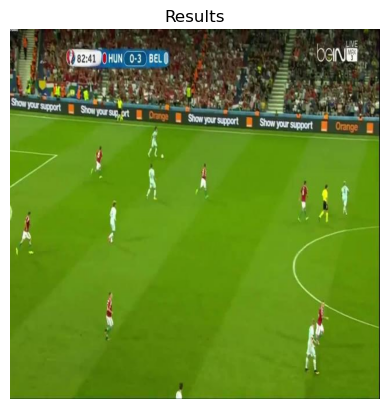

In [9]:
import matplotlib.pyplot as plt
import cv2

# Convert image color from BGR to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.imshow(image_rgb)
plt.title("Results")
plt.axis('off')
plt.show()
